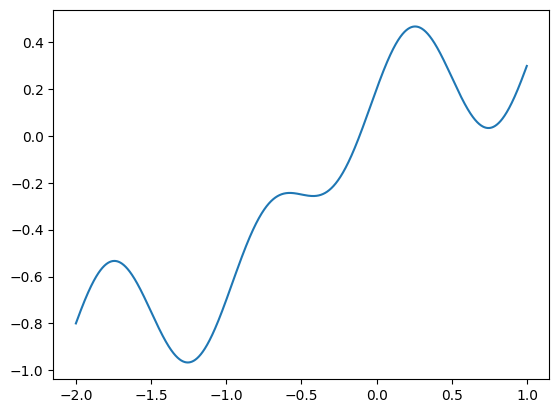

In [129]:
import numpy as np
import math
import matplotlib.pyplot as plt

def f(x):
    return 0.5*x + 0.2*math.cos(math.pi*x) + 0.2*math.sin(2*math.pi*x)

x = np.arange(-2, 1, 0.001)
def create_func_points(x, F):
    func = []
    for i in x:
        func.append(F(i))
    return func

f_points = create_func_points(x, f)
plt.plot(x, f_points)

In [130]:
def lips(a, b, n=1000):
    # разобьем прямую на 1000 точек
    x_values = np.linspace(a, b, n)

    # производная в каждой точке
    derivatives = np.zeros_like(x_values)
    for i, x in enumerate(x_values):
        dx = 1e-8
        der = (f(x + dx) - f(x - dx)) / (dx)
        # print(der)
        derivatives[i] = np.abs(der)

    # Максимальное значение производной как оценка константы Липшица
    lips = np.max(derivatives)

    # return 2*lips
    return lips

lips(-2, 1, n=1000)

3.5917783303140993

Итерации:  11
Точка экстремума:  -1.2561801556514147
Экстремум:  -0.9665884150952366


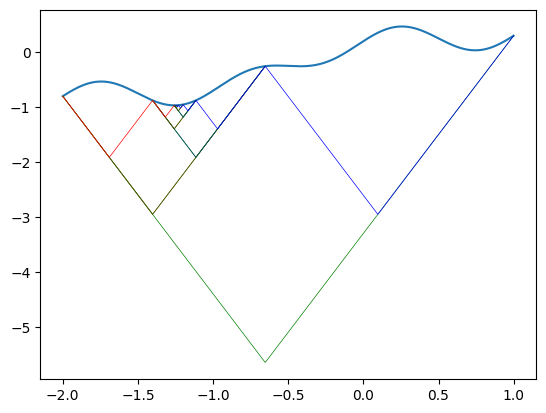

In [131]:
#точка пересечения графиков функций
def cross_point(Lx, Rx, L):
    return (f(Lx) - f(Rx)) / (2 * L) + (Lx + Rx) / 2

def bl(x, Lx, Rx, L):
        return max(f(Lx) - L*abs(x - Lx), f(Rx) - L*abs(x - Rx))

Lx_data = []
Rx_data = []
Inter_data = []

def piyavskii(a, b, N, eps):
    Lx = a
    Rx = b

    L = lips(a, b)
    plt.plot(x, f_points)

    for i in range(N):
        cp_x = cross_point(Lx, Rx, L)
        # print(cp_x)
        # print(f(cp_x))
        x1 = np.arange(Lx, Rx, 0.001)
        bl_points = []
        for j in x1:
            bl_points.append(bl(j, Lx, Rx, L))
        plt.plot(x1, bl_points, 'g', linewidth=0.5)

        cp_Lx = cross_point(Lx, cp_x, L)
        x1_1 = np.arange(Lx, cp_x, 0.001)
        bl_points = []
        for m in x1_1:
            bl_points.append(bl(m, Lx, cp_x, L))
        plt.plot(x1_1, bl_points, 'r', linewidth=0.5)


        cp_Rx = cross_point(cp_x, Rx, L)
        x1_1 = np.arange(cp_x, Rx, 0.001)
        bl_points = []
        for m in x1_1:
            bl_points.append(bl(m, Rx, cp_x, L))
        plt.plot(x1_1, bl_points, 'b', linewidth=0.5)

        if f(cp_Lx) <= f(cp_Rx):
            Rx = cp_x
        else:
            Lx = cp_x

        extr_p = cross_point(Lx, Rx, L)

        if abs(bl(extr_p, Lx, Rx, L) - f(extr_p)) < eps:
            print('Итерации: ', i)
            break

    print("Точка экстремума: ", extr_p)
    print("Экстремум: ", f(extr_p))
piyavskii(-2, 1, 100, 0.001)